# 0.0 Imports: libraries and modules
This section imports all necessary libraries and modules for this project.

>[NOTE]: a few Pandas' setting steps have also been taken.

In [537]:
# --- Imports --- #
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# --- Pandas settings --- #
pd.set_option('display.max_columns', 999) # show all columns on output.
pd.options.display.float_format = '{:.2f}'.format # show float with 2 decimal places.

# --- Warning settings --- #
warnings.filterwarnings('ignore') # ignore warnings.

## 0.1 - Data Understanding

In [538]:
# --- Data gathering --- #
data_path = 'https://raw.githubusercontent.com/bert-bruno/case_miw/refs/heads/main/data/DS_case_marketing_campaign.csv' # path to the data uploaded to github.
dataframe = pd.read_csv(data_path, sep=';') # read the data into a pandas dataframe.
# ---
dataframe.head(10) # show the first 10 rows of the dataframe.

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.00,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.00,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.00,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.00,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.00,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.00,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.00,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.00,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.00,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.00,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [539]:
# --- High level data exploration --- #
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [540]:
dataframe.describe() # show the descriptive statistics of the dataframe.

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.00,2240.00,2216.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00
mean,5592.16,1968.81,52247.25,0.44,0.51,49.11,303.94,26.30,166.95,37.53,27.06,44.02,2.33,4.08,2.66,5.79,5.32,0.07,0.07,0.07,0.06,0.01,0.01,3.00,11.00,0.15
std,3246.66,11.98,25173.08,0.54,0.54,28.96,336.60,39.77,225.72,54.63,41.28,52.17,1.93,2.78,2.92,3.25,2.43,0.26,0.26,0.26,0.25,0.11,0.10,0.00,0.00,0.36
min,0.00,1893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
25%,2828.25,1959.00,35303.00,0.00,0.00,24.00,23.75,1.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
50%,5458.50,1970.00,51381.50,0.00,0.00,49.00,173.50,8.00,67.00,12.00,8.00,24.00,2.00,4.00,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
75%,8427.75,1977.00,68522.00,1.00,1.00,74.00,504.25,33.00,232.00,50.00,33.00,56.00,3.00,6.00,4.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
max,11191.00,1996.00,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,263.00,362.00,15.00,27.00,28.00,13.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,11.00,1.00


**Initial insights:**

- Year_Birth: the minimum value for Year_Birth is 1893, which would make this particular customer 121 by the date he was signed in as a customer on MIW's CRM. This is highly unlikely.
- Income: there are 24 missing values for this column. Also, the max value for Income also seems odd. -> Further investigate this.
- Kidhome: there's a '2' entry. It seemed as a binary statement. -> Further investigate this.
- Teenhome: there's a '2' entry. It seemed as a binary statement. -> Further investigate this.
- AcceptedCmpX: these columns are unbalanced data. -> Check whether this impacts on clustering or not.
- Z_CostContact: all entries are the same.
- Z_Revenue: all entries are the same. 


## 0.2 - Data Exploration
This section also contains some basic preprocessing, such as data cleaning and outliers handling.


## 0.2.0 - Marital Status

[Text(0.5, 1.0, 'Marital Status Distribution')]

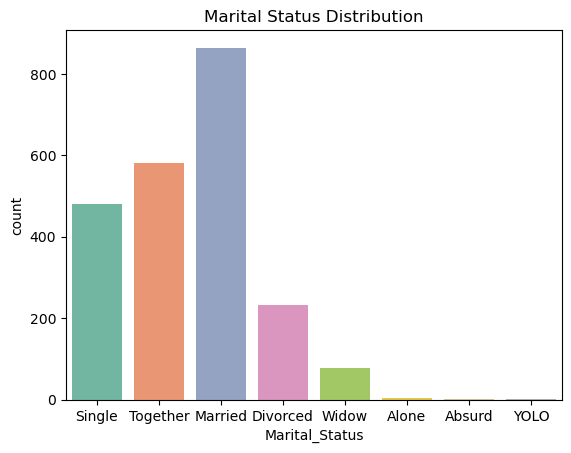

In [541]:
# --- Marital Status Distribution --- #
marital_status_count_plot = sns.countplot(data=dataframe, x='Marital_Status', palette='Set2') # create a countplot of the marital status.
marital_status_count_plot.set(title='Marital Status Distribution') # set the title of the plot.

- 'Alone' and 'Single' may be considered as the same status -> change from 'Alone' to 'Single';
- 'Absurd' and 'Yolo' have no meaning. -> drop those entries.

In [542]:
def clean_marital_status(dataframe:pd.DataFrame) -> pd.DataFrame:
    """
    Cleans the 'Marital_Status' column in the dataframe by:
    - Changing 'Alone' to 'Single'
    - Dropping rows with 'Absurd' or 'YOLO' as marital status

    Parameters:
    dataframe (pd.DataFrame): The dataframe to be cleaned

    Returns:
    pd.DataFrame: The cleaned dataframe
    """
    # --- Marital Status Cleaning --- #
    alone_marital_status = dataframe['Marital_Status'] == 'Alone' # filter the dataframe to get the rows with 'Alone' as marital status.
    dataframe.loc[alone_marital_status, 'Marital_Status'] = 'Single' # change the marital status from 'Alone' to 'Single'.
    # ---
    absurd_yolo_filter = (dataframe['Marital_Status'] == 'Absurd') | (dataframe['Marital_Status'] == 'YOLO') # filter the dataframe to get the rows with 'Absurd' or 'YOLO' as marital status.
    dataframe_drop = dataframe.loc[absurd_yolo_filter] # get the rows with 'Absurd' or 'YOLO' as marital status.
    dataframe.drop(index=dataframe_drop.index, inplace=True) # drop the rows with 'Absurd' or 'YOLO' as marital status.
    # ---
    return dataframe

# Apply the function to the dataframe
dataframe = clean_marital_status(dataframe)
# ---
dataframe.tail() # show the last 5 rows of the dataframe.

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.00,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.00,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.00,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.00,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.00,1,1,2012-10-15,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


### 0.2.1 - Year Birth

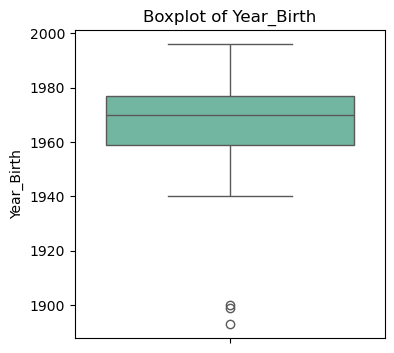

In [543]:
# --- Year Birth exploration --- #
plt.figure(figsize=(4, 4))
sns.boxplot(data=dataframe, y='Year_Birth', palette='Set2')
plt.title('Boxplot of Year_Birth')
plt.ylabel('Year_Birth')
plt.show()

**Decision 1:**

The existence of outliers could impact clustering algorithms such as KMeans due to it's distance based nature. It might be good practice to drop those 3 values, although one must recognize it is possible that people older than 100 years old keep buying from stores. I've decided to drop these values.

In [544]:
def drop_old_birth_years(dataframe: pd.DataFrame) -> pd.DataFrame:
    """
    Drops rows with birth years below 1914 from the dataframe.

    Parameters:
    dataframe (pd.DataFrame): The dataframe to be cleaned.

    Returns:
    pd.DataFrame: The cleaned dataframe.
    """
    # filter the birth years below 1914.
    year_birth_below_1914 = dataframe['Year_Birth'] < 1914
    # get the indexes of the birth years below 1914.
    year_birth_below_1914_idx = dataframe['Year_Birth'].loc[year_birth_below_1914].index
    # drop the rows with ages higher than 100 years old by 2014.
    dataframe.drop(year_birth_below_1914_idx, inplace=True)
    # ---
    return dataframe

# Apply the function to the dataframe
dataframe = drop_old_birth_years(dataframe)
# ---
dataframe.tail() # show the last 5 rows of the dataframe.

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.00,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.00,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.00,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.00,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.00,1,1,2012-10-15,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [545]:
# --- Year Birth -> convert to Age --- #
def convert_year_birth_to_age(dataframe: pd.DataFrame) -> pd.DataFrame:
    """
    Convert the 'Year_Birth' column to an 'Age' column and drop the 'Year_Birth' column.

    This function takes a dataframe with a 'Year_Birth' column, calculates the age of individuals
    by subtracting the birth year from 2014, and creates a new 'Age' column. The original 'Year_Birth'
    column is then dropped from the dataframe.

    Args:
        dataframe (pd.DataFrame): The input dataframe containing a 'Year_Birth' column.

    Returns:
        pd.DataFrame: The modified dataframe with the 'Age' column and without the 'Year_Birth' column.
    """
    dataframe['Age'] = 2014 - dataframe['Year_Birth'] # create a new column 'Age' from the 'Year_Birth' column.
    dataframe.drop(columns='Year_Birth', inplace=True) # drop the 'Year_Birth' column.
    # ---
    return dataframe

# Apply the function to the dataframe
dataframe = convert_year_birth_to_age(dataframe)
# ---
dataframe.tail() # show the last 5 rows of the dataframe.

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
2235,10870,Graduation,Married,61223.00,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,47
2236,4001,PhD,Together,64014.00,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,68
2237,7270,Graduation,Divorced,56981.00,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,33
2238,8235,Master,Together,69245.00,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,58
2239,9405,PhD,Married,52869.00,1,1,2012-10-15,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1,60


### 0.2.2 - Income

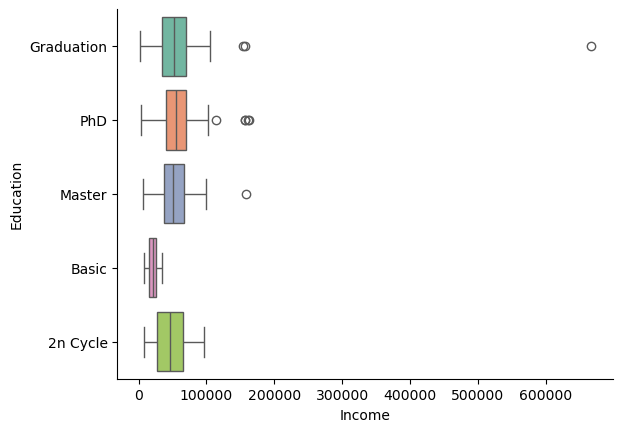

In [546]:
# --- Income Exploration --- # 
# Plot the distribution of the 'Income' column x 'Education' column.
sns.boxplot(data=dataframe,
            x='Income', 
            hue='Education',
            y='Education',
            palette='Set2')
sns.despine() # remove the top and right spines from the plot.

In [547]:
# --- Income missing values --- #
income_missing_values_qtt = dataframe.loc[dataframe['Income'].isna()].shape[0] # quantity of missing values in the 'Income' column.
total_of_rows = dataframe.shape[0] # total quantity of rows in the dataframe.

print(f'Percentage of missing values in the "Income" column: {round(income_missing_values_qtt / total_of_rows * 100, 2)}%')

Percentage of missing values in the "Income" column: 1.07%


**Decision 2:**

Since there is approximately 1% of missing values (regardig `Income`), these incomplete entries will simply be dropped.

In [548]:
# --- Drop Income missing values --- #
def drop_income_missing_values(dataframe: pd.DataFrame) -> pd.DataFrame:
    """
    Drops rows with missing values in the 'Income' column, resets the index, and drops the 'index' column.

    Parameters:
    dataframe (pd.DataFrame): The dataframe to be cleaned.

    Returns:
    pd.DataFrame: The cleaned dataframe.
    """
    dataframe = dataframe.dropna(subset=['Income']) # drop the rows with missing values in the 'Income' column.
    dataframe = dataframe.reset_index() # reset the index of the dataframe.
    dataframe = dataframe.drop(columns=['index'], axis=1) # drop the 'index' column.
    # ---
    return dataframe

# Apply the function to the dataframe
dataframe = drop_income_missing_values(dataframe)
# ---
dataframe.tail() # show the last 5 rows of the dataframe.

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
2204,10870,Graduation,Married,61223.00,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,47
2205,4001,PhD,Together,64014.00,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,68
2206,7270,Graduation,Divorced,56981.00,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,33
2207,8235,Master,Together,69245.00,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,58
2208,9405,PhD,Married,52869.00,1,1,2012-10-15,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1,60


**Decision 3**: 
There is one single value of income that greatly differs from the rest of the distribution, which might impact the clustering process. This value will also be dropped.

In [549]:
# --- Drop Income outliers --- #
def drop_high_income_rows(dataframe: pd.DataFrame) -> pd.DataFrame:
    """
    Drops rows with income greater than 600000 from the dataframe.

    Parameters:
    dataframe (pd.DataFrame): The dataframe to be cleaned.

    Returns:
    pd.DataFrame: The cleaned dataframe.
    """
    income_greater_than_six_hundred_thousand = dataframe['Income'] > 600000 # filter the rows with income greater than 600000.    
    income_greater_than_six_hundred_thousand_idx = dataframe['Income'].loc[income_greater_than_six_hundred_thousand].index # get the indexes of the rows with income greater than 600000.     
    dataframe.drop(income_greater_than_six_hundred_thousand_idx, inplace=True) # drop the rows with income greater than 600000.  
    dataframe = dataframe.reset_index()  # reset the index of the dataframe.
    dataframe = dataframe.drop(columns=['index'], axis=1)  # drop the 'index' column.
    # ---
    return dataframe

# Apply the function to the dataframe
dataframe = drop_high_income_rows(dataframe)
# ---
dataframe.tail() # show the last 5 rows of the dataframe.

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
2203,10870,Graduation,Married,61223.00,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,47
2204,4001,PhD,Together,64014.00,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,68
2205,7270,Graduation,Divorced,56981.00,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,33
2206,8235,Master,Together,69245.00,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,58
2207,9405,PhD,Married,52869.00,1,1,2012-10-15,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1,60


In [550]:
# --- Remaining outliers --- #
income_quartile_1 = dataframe['Income'].quantile(0.25) # get the first quantile of the 'Income' column.
income_quartile_3 = dataframe['Income'].quantile(0.75) # get the third quantile of the 'Income' column.

IQR = income_quartile_3 - income_quartile_1 # calculate the Interquartile Range.

outliers = dataframe[(dataframe['Income'] < (income_quartile_1 - 1.5 * IQR)) | (dataframe['Income'] > (income_quartile_3 + 1.5 * IQR))] # filter the outliers in the 'Income' column.
outliers['Income'].describe()

count        7.00
mean    158024.29
std       2778.83
min     153924.00
25%     157035.00
50%     157243.00
75%     159268.00
max     162397.00
Name: Income, dtype: float64

**Decision 4:**
Although the values above are considered as outliers in the sight of the Interquartile Range Rule, the income values still make sense. In order not to drop the reffered instances, they could be changed to fit the 0.95 percentile of the distribution. By doing this, one could prevent any distortions on distance-based clustering algorithms.

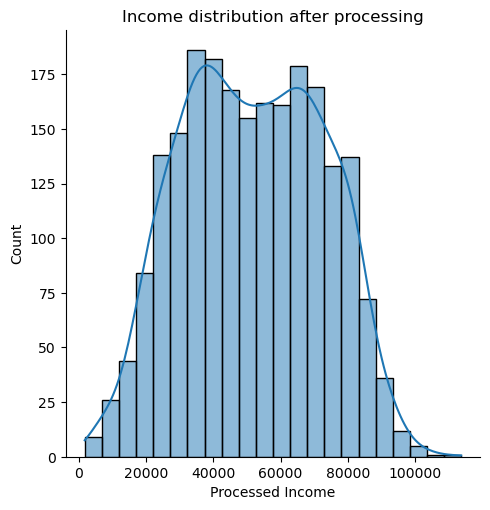

In [551]:
# --- Outliers preprocessing --- #
dataframe['Income'].loc[outliers.index] = dataframe['Income'].quantile(0.95) # replace the outliers with the 95th quantile of the 'Income' column.
# --- Plotting the distribution of the 'Income' column after processing --- #
income_plot_after_processing = sns.displot(data=dataframe, x='Income', kde=True) # plot the distribution of the 'Income' column after processing.
income_plot_after_processing.set(title='Income distribution after processing', xlabel='Processed Income') # set the title and the x label of the plot.

### 0.2.3 - Kidhome

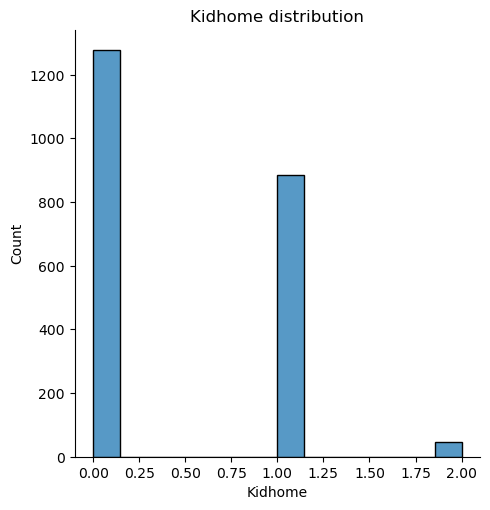

In [552]:
# --- Kidhome exploration --- #
kidhome_distribution = sns.displot(data=dataframe, x='Kidhome') # plot the distribution of the 'Kidhome' column.
kidhome_distribution.set(title='Kidhome distribution', xlabel='Kidhome') # set the title and the x label of the plot.

### 0.2.4 - Teenhome

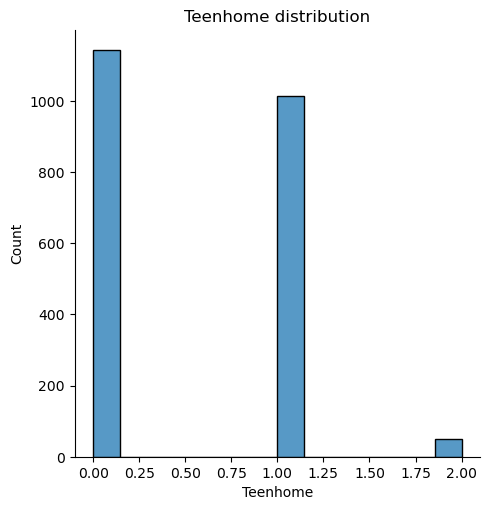

In [553]:
# --- Teenhome exploration --- #
teenhome_distribution = sns.displot(data=dataframe, x='Teenhome') # plot the distribution of the 'Teenhome' column.
teenhome_distribution.set(title='Teenhome distribution', xlabel='Teenhome') # set the title and the x label of the plot.

Both `Kidhome` and `Teenhome` variables are not binary as previously stated on README. On the contrary, they must be numerical variables that either represent the actual number of kids and teens or some type of range. 

### 0.2.5 - AcceptedCmpX

In [554]:
# --- AcceptedCmpX exploration --- #
number_of_accepted_campagins = dataframe[dataframe[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].values == 1].shape[0] # check the rows with the 'AcceptedCmpX' columns with value 1 and stores the number of rows.
total_of_rows = dataframe.shape[0] # total quantity of rows in the dataframe.
# ---
print(f'Percentage of customers who accepted at least one campaign: {round(number_of_accepted_campagins / total_of_rows * 100, 2)}%')

Percentage of customers who accepted at least one campaign: 29.8%


The ratio $\frac{AcceptedCampaigns}{TotalInstances} \approx 30\%$. This might represent an issue of unbalanced data if this project ever evolves to a predictive/classification approach.

### 0.2.6 - Z_CostContact & Z_Revenue

In [555]:
# --- Z_CostContact exploration --- #
dataframe.Z_CostContact.nunique()
print(f'Number of unique elements in the "Z_CostContact" column: {dataframe.Z_CostContact.nunique()}')

Number of unique elements in the "Z_CostContact" column: 1


In [556]:
# --- Z_Revenue exploration --- #
dataframe.Z_Revenue.nunique()
print(f'Number of unique elements in the "Z_Revenue" column: {dataframe.Z_Revenue.nunique()}')

Number of unique elements in the "Z_Revenue" column: 1


**Decision 5:**
Since both `Z_CostContact` and `Z_Revenue` contain only one single value each, these variables will not help on Clustering customers and one could safely drop them from the dataframe.

In [557]:
# --- Drop Z_CostContact and Z_Revenue columns --- #
dataframe.drop(columns=['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True) # drop the 'Z_CostContact' and 'Z_Revenue' columns.
# ---
dataframe.tail() # show the last 5 rows of the dataframe.

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
2203,10870,Graduation,Married,61223.00,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,47
2204,4001,PhD,Together,64014.00,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,68
2205,7270,Graduation,Divorced,56981.00,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,33
2206,8235,Master,Together,69245.00,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,58
2207,9405,PhD,Married,52869.00,1,1,2012-10-15,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,1,60


## 0.2.7 - ID 

Since Customer ID is a representation of the customer whithin MIW's database, it's not actually a column that represents a feature of the client. Given this scenario, one could safely drop it as well.

In [558]:
# --- Drop ID column --- #
dataframe.drop(columns=['ID'], axis=1, inplace=True) # drop the 'ID' column.
# ---
dataframe.tail() # show the last 5 rows of the dataframe.

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
2203,Graduation,Married,61223.00,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,47
2204,PhD,Together,64014.00,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,68
2205,Graduation,Divorced,56981.00,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,33
2206,Master,Together,69245.00,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,58
2207,PhD,Married,52869.00,1,1,2012-10-15,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,1,60


## 0.2.8 - Dt_Customer

This feature has been stored as an 'object', but represents a date. To improve this variable's further handling, let's convert it to datetime type.

In [559]:
def preprocess_dt_customer(dataframe: pd.DataFrame) -> pd.DataFrame:
    """
    Preprocesses the 'Dt_Customer' column in the dataframe by converting it to datetime format,
    printing the oldest and newest instances, and creating a new 'Batch' column based on the year.

    Parameters:
    dataframe (pd.DataFrame): The dataframe to be processed.

    Returns:
    pd.DataFrame: The processed dataframe.
    """
    # --- Dt_Customer preprocessing --- #
    dataframe['Dt_Customer'] = pd.to_datetime(dataframe['Dt_Customer'], format="%Y-%m-%d") # convert the 'Dt_Customer' column to datetime format.
    # print oldest instance
    print('Oldest: ', min(dataframe['Dt_Customer']))
    # print newest instance
    print('Newest: ', max(dataframe['Dt_Customer']))

    dataframe['Batch'] = dataframe['Dt_Customer'].dt.year # Create new column 'Batch' to accomodate customers based in the year they've become customers
    # ---
    indicators = {2012: 1, 2013: 2, 2014: 3} # create a dictionary with the years and their respective indicators.
    dataframe['Batch'] = dataframe['Batch'].replace(indicators) # replace the years with their respective indicators.
    dataframe.drop(columns=['Dt_Customer'], axis=1, inplace=True) # drop the 'Dt_Customer' column.
    # ---
    return dataframe

# Apply the function to the dataframe
dataframe = preprocess_dt_customer(dataframe)
dataframe.tail() # show the last 5 rows of the dataframe.

Oldest:  2012-07-30 00:00:00
Newest:  2014-06-29 00:00:00


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Batch
2203,Graduation,Married,61223.00,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,47,2
2204,PhD,Together,64014.00,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,68,3
2205,Graduation,Divorced,56981.00,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,33,3
2206,Master,Together,69245.00,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,58,3
2207,PhD,Married,52869.00,1,1,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,1,60,1


## 0.2.9 - Complain

In this section, we shall check whether the number of complaints is relevant.

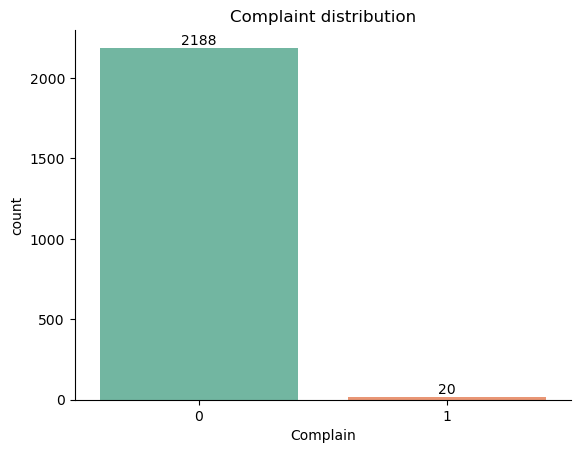

In [560]:
# --- Complain exploration --- #
complain_distribution = sns.countplot(data=dataframe, x='Complain', palette='Set2') # create a countplot of the 'Complain' column.
complain_distribution.set(title='Complaint distribution') # set the title of the plot.
sns.despine() # remove the top and right spines from the plot.

# Annotate each bar with the count
for p in complain_distribution.patches:
    complain_distribution.annotate(format(p.get_height(), '.0f'), 
                                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                                   ha = 'center', va = 'center', 
                                   xytext = (0, 5), 
                                   textcoords = 'offset points')

In [561]:
ratio_of_complaints = (20 / dataframe.shape[0] * 100)
print(f'Ratio of complaints: {round(ratio_of_complaints, 2)}%')

Ratio of complaints: 0.91%


The ratio of complaints is $\frac{\#Complaints}{\#Total}\approx 0.91\%$, which doesn't provide much hope that one might be able to extract a lot of information from these instances. Nonetheless, it server its purpose as evidence that both MIW's products and service are not facing any quality issues.

**As the ratio is indeed low, one may drop this column as well.**

In [562]:
# --- Drop Complain column --- #
dataframe.drop(columns=['Complain'], axis=1, inplace=True)
dataframe.reset_index(drop=True, inplace=True) # reset the index of the dataframe.
# ---
dataframe.tail() # show the last 5 rows of the dataframe.

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,Batch
2203,Graduation,Married,61223.00,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,47,2
2204,PhD,Together,64014.00,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,68,3
2205,Graduation,Divorced,56981.00,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,33,3
2206,Master,Together,69245.00,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,58,3
2207,PhD,Married,52869.00,1,1,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,1,60,1


## 1.0 - Descriptive Analysis

This section's main goal is to perform a high level descriptive analysis of the dataset and it's features.

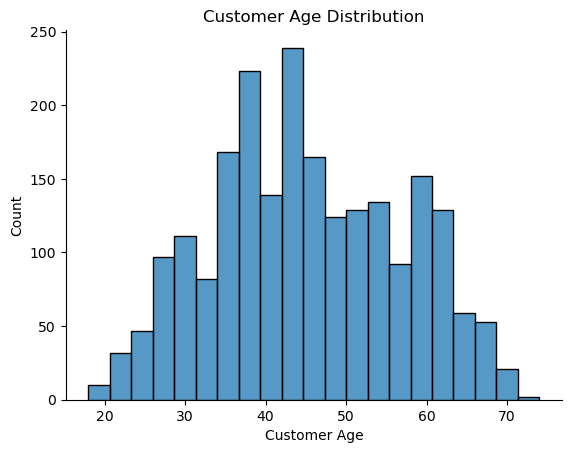

In [563]:
# --- Customer Age Distribution --- #
customer_age_distribution = sns.histplot(data=dataframe, x='Age', palette='Set2') # plot the distribution of the 'Age' column.
customer_age_distribution.set(title='Customer Age Distribution', xlabel='Customer Age') # set the title and the x label of the plot.
sns.despine() # remove the top and right spines from the plot.

In order to enhance visualization to following features, one might add categories to 'Ages'.

In [564]:
# --- Ages categories creation --- #
age_quantile_1 = dataframe['Age'].quantile(0.33) # get the first quantile of the 'Age' column. ~33% of the data
age_quantile_3 = dataframe['Age'].quantile(0.66) # get the third quantile of the 'Age' column. ~33% of the data
age_max = dataframe['Age'].max() 
age_min = dataframe['Age'].min()
# ---
print(age_min, 
      age_quantile_1, 
      age_quantile_3, 
      age_max)

18 39.0 50.0 74


In [565]:
age_labels = ['18-39', '39-50', '50-78'] # Define age labels for the age ranges
age_ranges = [0, 39, 50, 74] # Define the age ranges (bins) for categorizing the ages
# ---
# Create a new column 'Age_Range' in the dataframe by categorizing the 'Age' column using the defined age ranges and labels
dataframe['Age_Range'] = pd.cut(dataframe['Age'], bins=age_ranges, labels=age_labels)
# ---
dataframe.tail()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,Batch,Age_Range
2203,Graduation,Married,61223.00,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,47,2,39-50
2204,PhD,Together,64014.00,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,68,3,50-78
2205,Graduation,Divorced,56981.00,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,33,3,18-39
2206,Master,Together,69245.00,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,58,3,50-78
2207,PhD,Married,52869.00,1,1,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,1,60,1,50-78


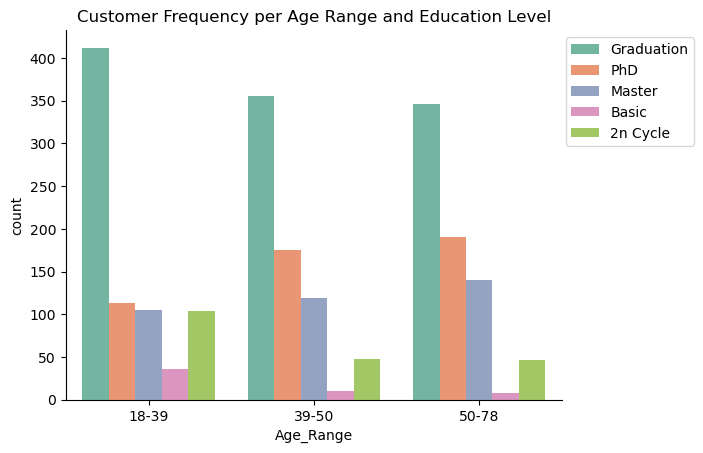

In [566]:
# --- Most frequent categories buying from MIW --- #
most_frequent_customers = sns.countplot(data=dataframe, x=dataframe['Age_Range'], hue='Education', palette='Set2') # create a countplot of the 'Age_Range' column.
most_frequent_customers.set(title='Customer Frequency per Age Range and Education Level') # set the title of the plot.
most_frequent_customers.legend(loc='upper right', bbox_to_anchor=(1.28, 1)) # set the legend position.
sns.despine() # remove the top and right spines from the plot.

**Observations:**
- Most frequent category: Graduation

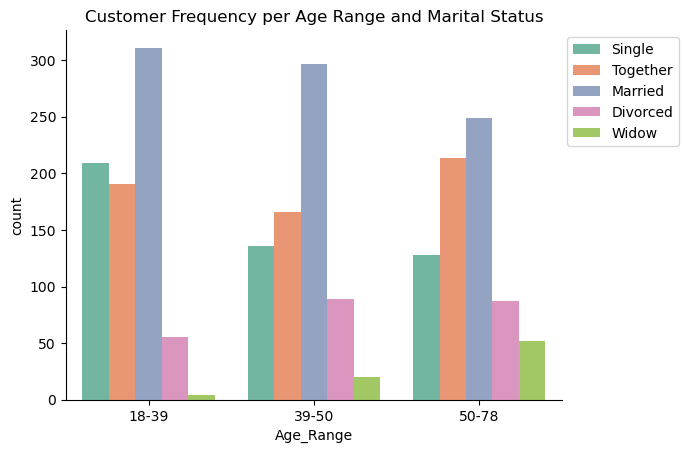

In [567]:
# --- Marital Status per Age Range --- #
marital_status_countplot = sns.countplot(data=dataframe, x='Age_Range', hue='Marital_Status', palette='Set2') # create a countplot of the 'Age_Range' column.
marital_status_countplot.set(title='Customer Frequency per Age Range and Marital Status') # set the title of the plot.
marital_status_countplot.legend(loc='upper right', bbox_to_anchor=(1.25, 1)) # set the legend position.
sns.despine() # remove the top and right spines from the plot.

**Observations:**
- Most frequent category: Married;
- Number of Singles tends to drop significantly for people aged 39+.

### Best Selling Products

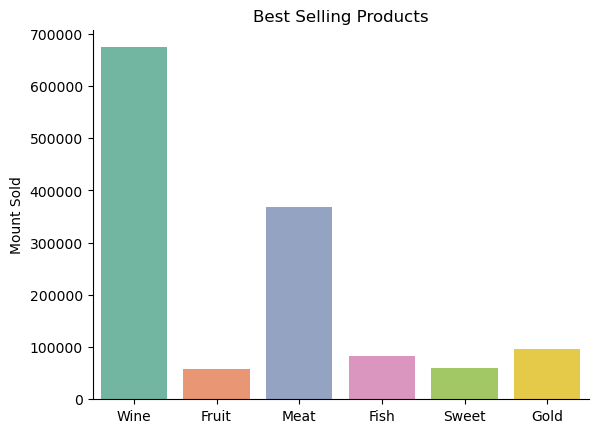

In [568]:
# --- Best Selling Products Viz --- #
product_categories = ['Wine', 'Fruit', 'Meat', 'Fish', 'Sweet', 'Gold'] # define the products categories based on the dataframe columns.
values = [dataframe[col].sum() for col in dataframe.columns[6:12]] # get the sum of each product category.
# ---
best_selling_products = sns.barplot(x=product_categories, y=values, palette='Set2') # create a barplot of the best selling products.
best_selling_products.set(title='Best Selling Products', ylabel='Mount Sold') # set the title and the y label of the plot.
sns.despine() # remove the top and right spines from the plot.

**Observations:**
- Wines are the most sold products;
- Meat is the second most sold product;

### Marketing Campaing Success

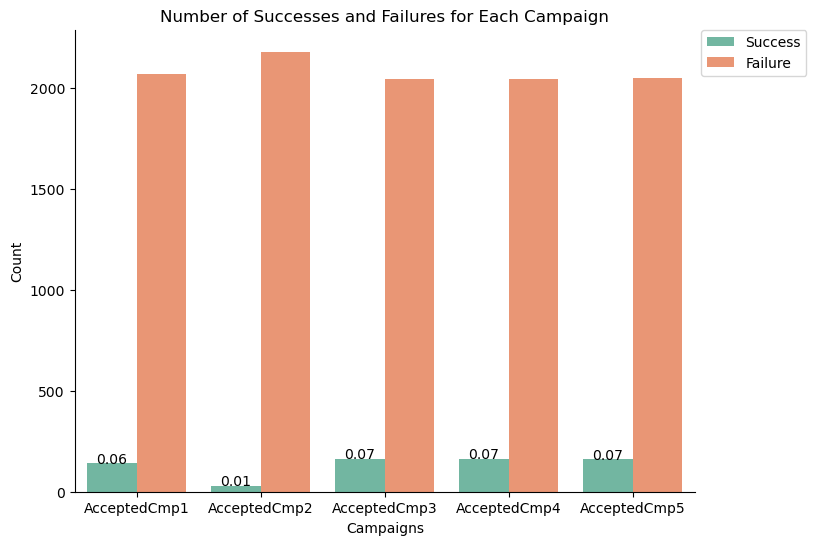

In [585]:
# --- Campaigns Acceptance Viz --- #
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'] # define the campaign columns.
# ---
campaign_name = [] # create an empty list to store the campaign names.
status = [] # create an empty list to store the status of the campaigns.
counts = [] # create an empty list to store the counts of the campaigns.
success_ratios = [] # create an empty list to store the success ratios of the campaigns.
# ---
for col in campaign_columns: # iterate over the campaign columns to count sucesses and failures.
    successes = dataframe[col].sum() # count the successes of the campaign.
    total = dataframe.shape[0] # get the total number of rows in the dataframe.
    failures = total - successes # count the failures of the campaign.
    sucess_ratio = successes / total # calculate the success ratio of the campaign.

    # append the campaign name, status, and counts to the respective lists.
    campaign_name.extend([col, col]) # append the campaign name.
    status.extend(['Success', 'Failure']) # append the status of the campaign.
    counts.extend([successes, failures]) # append the counts of the campaign.
# ---
plot_data = pd.DataFrame({'Campaign': campaign_name, 
                          'Status': status,
                          'Counts': counts
                          }) # create a dataframe from the lists.
# --- Plot settings --- #
plt.figure(figsize=(8,6)) # set the figure size.
plot = sns.barplot(x='Campaign', y='Counts', hue='Status', data=plot_data, palette='Set2')
sns.despine() # remove the top and right spines from the plot.
plt.title('Number of Successes and Failures for Each Campaign') # set the title of the plot.
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.ylabel('Count') # set the y label of the plot.
plt.xlabel('Campaigns') # set the x label of the plot.
# --- Annotate the success ratio of each campaign --- #
for i, col in enumerate(campaign_columns):
    success_value = plot_data[(plot_data['Campaign'] == col) & (plot_data['Status'] == 'Success')]['Counts'].values[0]
    total_value = dataframe.shape[0]
    ratio = success_value / total_value
    plot.text(i - 0.2, success_value + 0.05, f'{ratio:.2f}', color='black', ha="center")
# ---
plt.show() # show the plot.

### Sales' Channels

Text(0.5, 1.0, 'Sales Channel Distribution')

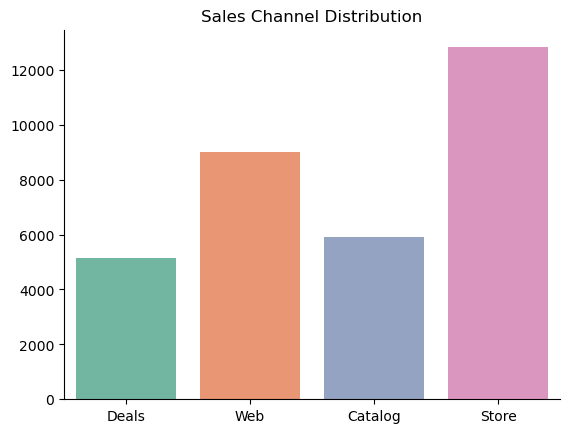

In [591]:
# --- Sales Channel Viz --- #
sales_channels = ['Deals', 'Web', 'Catalog', 'Store'] # define the sales channels based on the dataframe columns.
values = [dataframe[col].sum() for col in dataframe.columns[12:16]] # get the sum of each sales channel.
# ---
sns.barplot(x=sales_channels, y=values, palette='Set2') # create a barplot of the sales channels.
sns.despine() # remove the top and right spines from the plot.
plt.title('Sales Channel Distribution') # set the title of the plot.

In [590]:
dataframe

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,Batch,Age_Range
0,Graduation,Single,58138.00,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,57,1,50-78
1,Graduation,Single,46344.00,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,60,3,50-78
2,Graduation,Together,71613.00,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,49,2,39-50
3,Graduation,Together,26646.00,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,30,3,18-39
4,PhD,Married,58293.00,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,33,3,18-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,Graduation,Married,61223.00,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,47,2,39-50
2204,PhD,Together,64014.00,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,68,3,50-78
2205,Graduation,Divorced,56981.00,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,33,3,18-39
2206,Master,Together,69245.00,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,58,3,50-78


## 1.2.8 - Multivariate Analysis

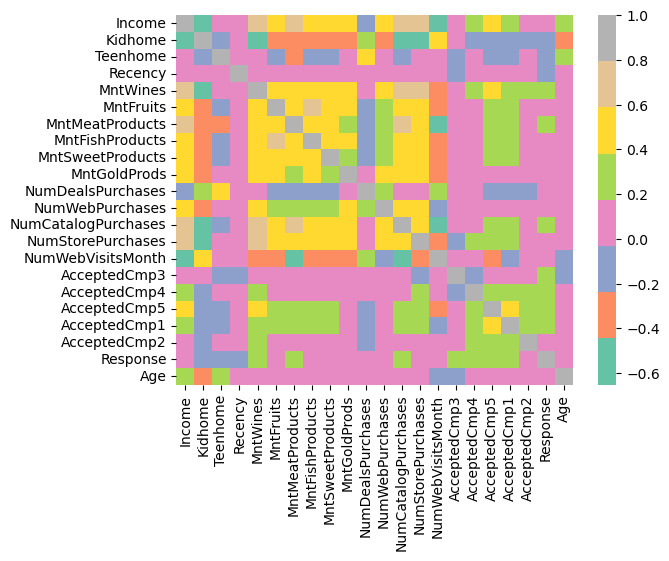

In [570]:
# --- Numerical Data Exploration --- #
numerical_data = dataframe.select_dtypes(include=['int64', 'float64']) # select the numerical data from the dataframe.
# --- Correlation matrix --- #
numerical_data_heatmap = sns.heatmap(numerical_data.corr(), annot=False, cmap='Set2') # plot the correlation matrix of the numerical data.

In [571]:
# Numerical correlation matrix
numerical_data.corr()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age
Income,1.00,-0.53,0.04,0.01,0.72,0.53,0.69,0.55,0.55,0.41,-0.12,0.49,0.69,0.67,-0.65,-0.01,0.23,0.41,0.34,0.11,0.17,0.21
Kidhome,-0.53,1.00,-0.04,0.01,-0.50,-0.37,-0.44,-0.39,-0.38,-0.35,0.22,-0.37,-0.50,-0.50,0.45,0.02,-0.16,-0.20,-0.17,-0.08,-0.08,-0.24
Teenhome,0.04,-0.04,1.00,0.02,0.00,-0.17,-0.26,-0.20,-0.16,-0.02,0.39,0.16,-0.11,0.05,0.13,-0.04,0.04,-0.19,-0.14,-0.02,-0.15,0.36
Recency,0.01,0.01,0.02,1.00,0.02,-0.01,0.02,-0.00,0.02,0.02,0.00,-0.00,0.02,-0.00,-0.02,-0.03,0.02,-0.00,-0.02,-0.00,-0.20,0.02
MntWines,0.72,-0.50,0.00,0.02,1.00,0.39,0.57,0.40,0.39,0.39,0.01,0.55,0.63,0.64,-0.32,0.06,0.37,0.47,0.35,0.21,0.25,0.17
MntFruits,0.53,-0.37,-0.17,-0.01,0.39,1.00,0.55,0.59,0.57,0.39,-0.13,0.30,0.48,0.46,-0.42,0.01,0.01,0.21,0.19,-0.01,0.12,0.01
MntMeatProducts,0.69,-0.44,-0.26,0.02,0.57,0.55,1.00,0.57,0.54,0.36,-0.12,0.31,0.73,0.49,-0.54,0.02,0.09,0.38,0.32,0.04,0.24,0.03
MntFishProducts,0.55,-0.39,-0.20,-0.00,0.40,0.59,0.57,1.00,0.59,0.42,-0.14,0.30,0.53,0.46,-0.44,0.00,0.02,0.19,0.26,0.00,0.11,0.04
MntSweetProducts,0.55,-0.38,-0.16,0.02,0.39,0.57,0.54,0.59,1.00,0.36,-0.12,0.33,0.49,0.46,-0.42,0.00,0.03,0.26,0.24,0.01,0.12,0.02
MntGoldProds,0.41,-0.35,-0.02,0.02,0.39,0.39,0.36,0.42,0.36,1.00,0.05,0.41,0.44,0.39,-0.24,0.13,0.03,0.17,0.17,0.05,0.14,0.06


**Add insights**

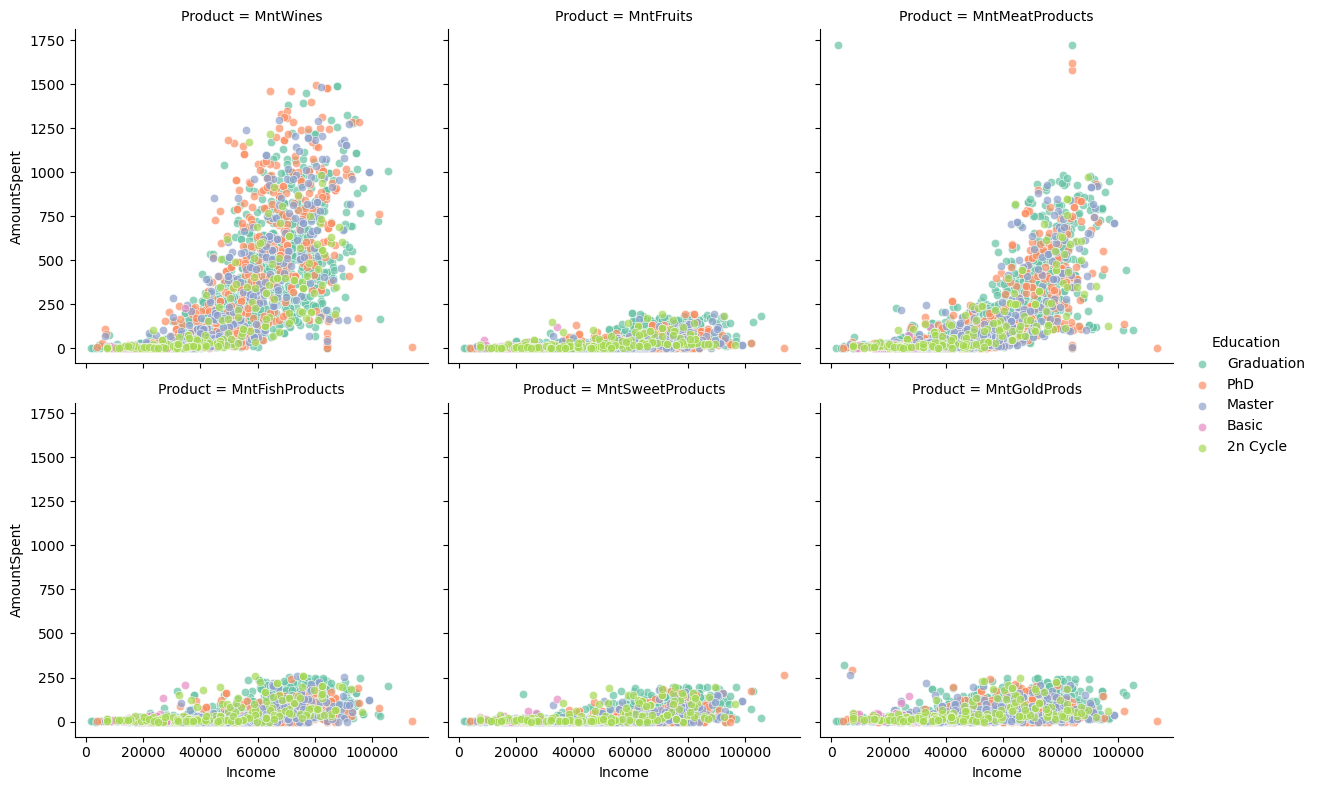

In [572]:
columns_to_plot = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'] # List of columns to create scatterplots against 'Income'

# Melt the dataframe for easier plotting with Seaborn
df_melted = dataframe.melt(id_vars=['Income', 'Education'], value_vars=columns_to_plot, 
                           var_name='Product', value_name='AmountSpent')
g = sns.FacetGrid(df_melted, col='Product', hue='Education', col_wrap=3, height=4, palette='Set2') # Set up the Seaborn FacetGrid
g.map(sns.scatterplot, 'Income', 'AmountSpent', alpha=0.7) # Map scatterplot to each subplot
g.add_legend() # Add legend to the plot
plt.show() # Show the plot

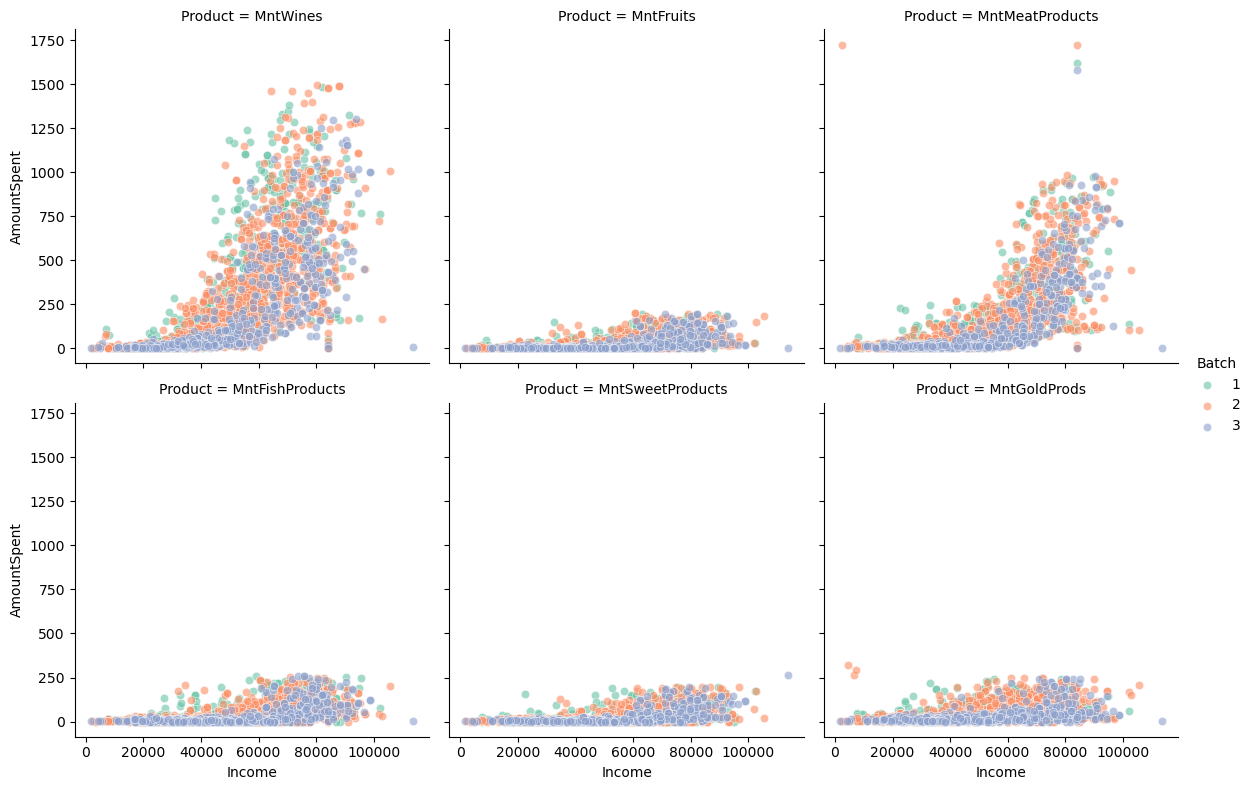

In [573]:
columns_to_plot = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'] # List of columns to create scatterplots against 'Income'

# Melt the dataframe for easier plotting with Seaborn
df_melted = dataframe.melt(id_vars=['Income', 'Batch'], value_vars=columns_to_plot, 
                           var_name='Product', value_name='AmountSpent')
g = sns.FacetGrid(df_melted, col='Product', hue='Batch', col_wrap=3, height=4, palette='Set2') # Set up the Seaborn FacetGrid
g.map(sns.scatterplot, 'Income', 'AmountSpent', alpha=0.6) # Map scatterplot to each subplot
g.add_legend() # Add legend to the plot
plt.show() # Show the plot

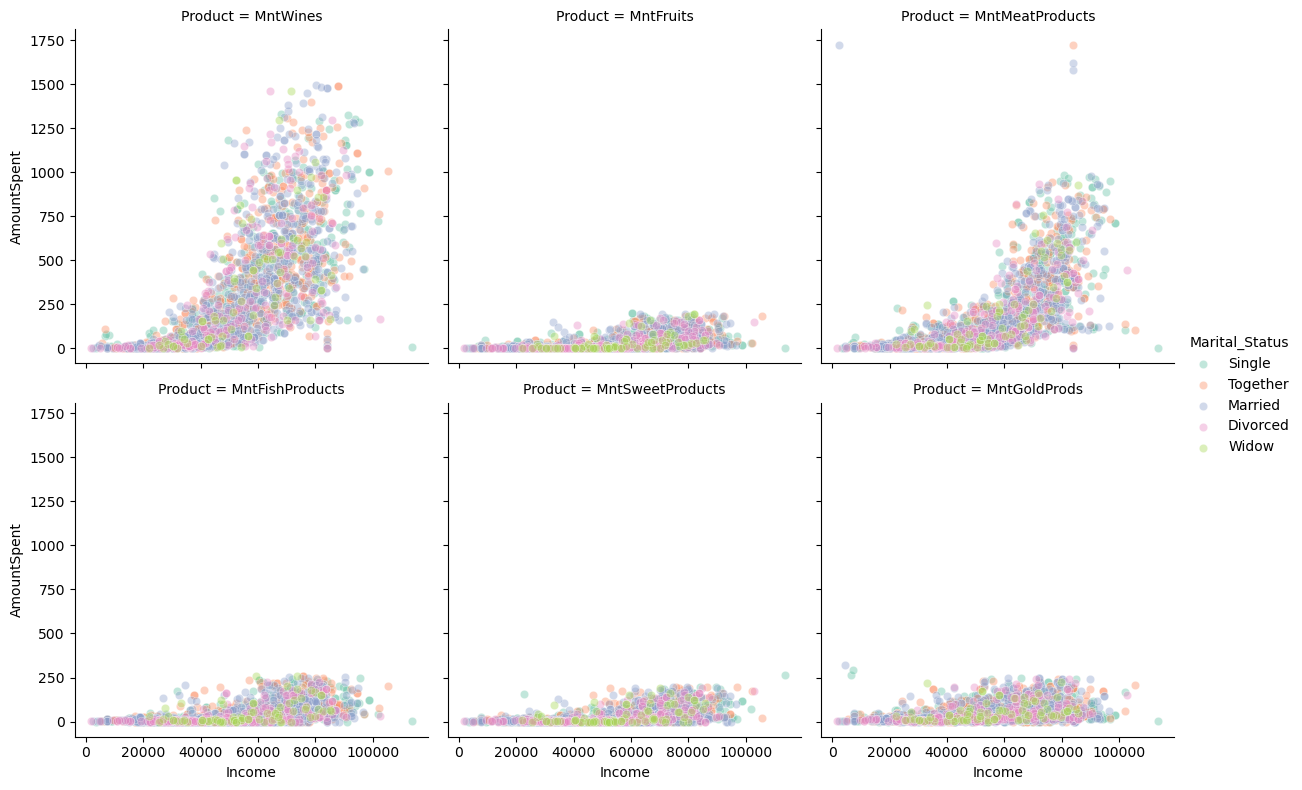

In [574]:
columns_to_plot = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'] # List of columns to create scatterplots against 'Income'

# Melt the dataframe for easier plotting with Seaborn
df_melted = dataframe.melt(id_vars=['Income', 'Marital_Status'], value_vars=columns_to_plot, 
                           var_name='Product', value_name='AmountSpent')
g = sns.FacetGrid(df_melted, col='Product', hue='Marital_Status', col_wrap=3, height=4, palette='Set2') # Set up the Seaborn FacetGrid
g.map(sns.scatterplot, 'Income', 'AmountSpent', alpha=0.4) # Map scatterplot to each subplot
g.add_legend() # Add legend to the plot
plt.show() # Show the plot

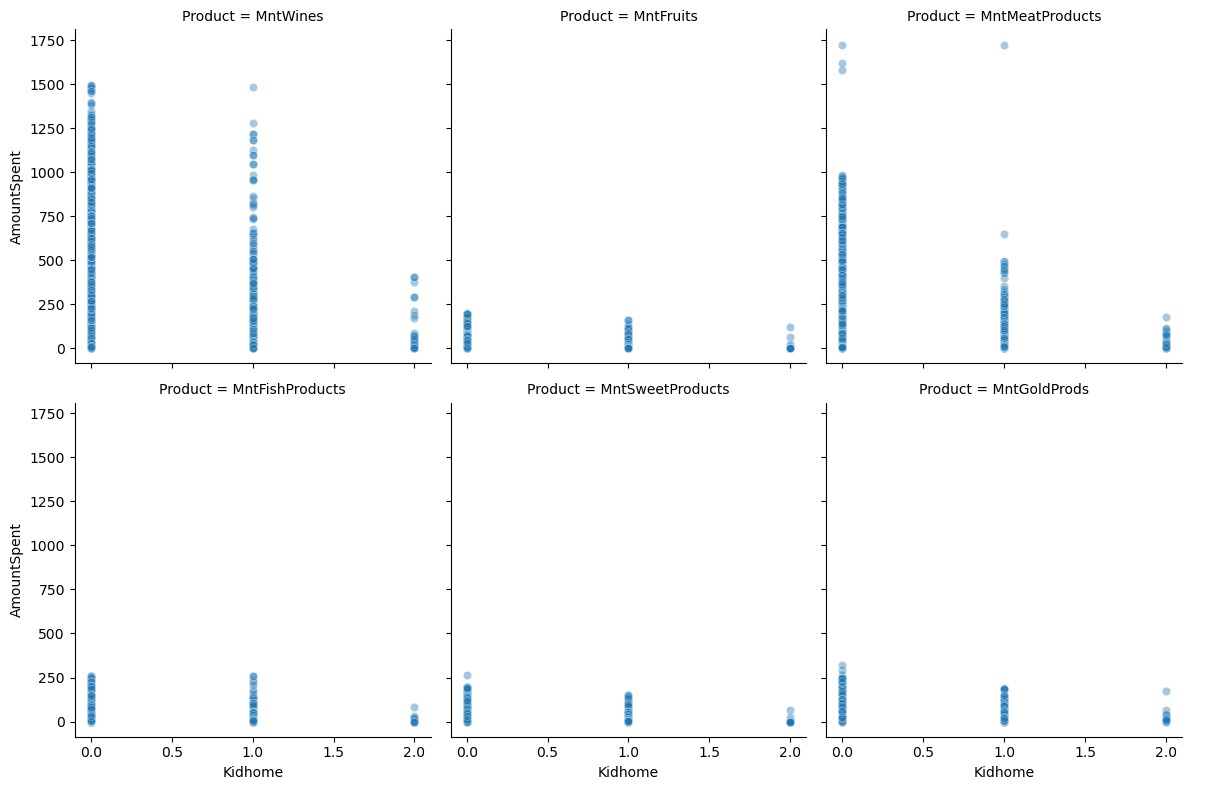

In [575]:
columns_to_plot = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'] # List of columns to create scatterplots against 'Kidhome'

# Melt the dataframe for easier plotting with Seaborn
df_melted = dataframe.melt(id_vars=['Kidhome'], value_vars=columns_to_plot, 
                           var_name='Product', value_name='AmountSpent')
g = sns.FacetGrid(df_melted, col='Product', col_wrap=3, height=4, palette='Set2') # Set up the Seaborn FacetGrid
g.map(sns.scatterplot, 'Kidhome', 'AmountSpent', alpha=0.4) # Map scatterplot to each subplot
g.add_legend() # Add legend to the plot
plt.show() # Show the plot

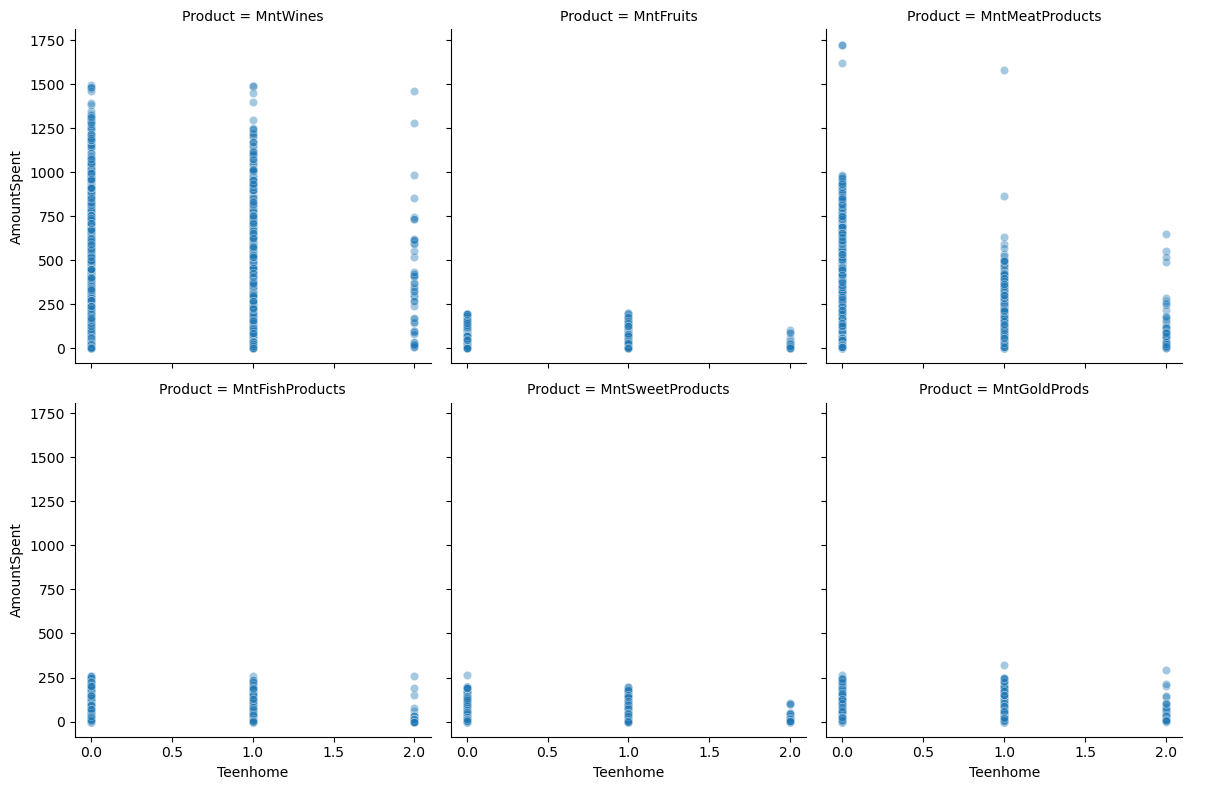

In [576]:
columns_to_plot = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'] # List of columns to create scatterplots against 'Teenhome'

# Melt the dataframe for easier plotting with Seaborn
df_melted = dataframe.melt(id_vars=['Teenhome'], value_vars=columns_to_plot, 
                           var_name='Product', value_name='AmountSpent')
g = sns.FacetGrid(df_melted, col='Product', col_wrap=3, height=4, palette='Set2') # Set up the Seaborn FacetGrid
g.map(sns.scatterplot, 'Teenhome', 'AmountSpent', alpha=0.4) # Map scatterplot to each subplot
g.add_legend() # Add legend to the plot
plt.show() # Show the plot